# GRIP - THE SPARKS FOUNDATION

## Data Science and Businesss Analytics Task 1 - Prediction Using Supervised ML

### Author : Devipriya Raju

# Importing the required libraries

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error


# Load the Data

In [22]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Explore the Data

In [121]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [117]:
df.isnull().sum() #checking the missing values

Hours     0
Scores    0
dtype: int64

There is no null values in the whole dataset and hence we can proceed from here.

# Visualizing th Data

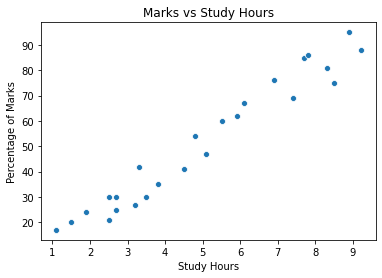

In [129]:
sns.scatterplot(df.Hours,df.Scores)
plt.title('Marks vs Study Hours')
plt.ylabel('Percentage of Marks')
plt.xlabel('Study Hours')
plt.show()

We can conclude that there is positive correlation relationship between the 2 variables and hence we can proceed with linear regression model (i.e) As the number of study hours increases, the percentage of the marks obtained also gets increased.

In [13]:
df.corr() #The correlation between 2 variables is positive and quite high.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing the Data

In [105]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)  #Splitting the data

In [119]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((18, 1), (7, 1), (18,), (7,))

# Training the model

In [131]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
print("\n Model Training Completed")


 Model Training Completed


# Predicting the Marks

In [109]:
Y_pred = reg.predict(X_test)

In [110]:
df1 = pd.DataFrame({'Actual_Marks': Y_test, 'Predicted_Marks' : Y_pred})
df1['Study_Hours'] =X_test
df1

,Actual_Marks,Predicted_Marks,Study_Hours
0,20,16.844722,1.5
1,27,33.745575,3.2
2,69,75.500624,7.4
3,30,26.786400,2.5
4,62,60.588106,5.9
5,35,39.710582,3.8
6,24,20.821393,1.9


### Predicted Marks vs Actual Marks

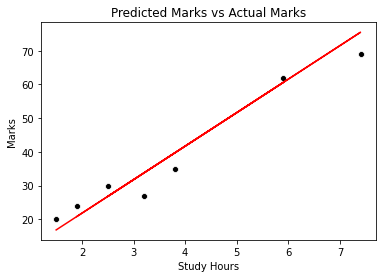

In [111]:
sns.scatterplot(df1.Study_Hours, df1.Actual_Marks, color= "Black")
plt.plot(df1.Study_Hours, df1.Predicted_Marks,color ='Red')
plt.title('Predicted Marks vs Actual Marks')
plt.ylabel('Marks')
plt.xlabel('Study Hours')
plt.show()

## Evaluating the Model

In [134]:
 #calculating the accuracy of the model

print('Mean Absolute Error : ', mean_absolute_error(df1.Actual_Marks,df1.Predicted_Marks))
print('Mean Squared Error : ', mean_squared_error(df1.Actual_Marks,df1.Predicted_Marks))
print('Root Mean Squared Error : ', mean_squared_error(df1.Actual_Marks,df1.Predicted_Marks,squared=False))

Mean Absolute Error :  4.130879918502486
Mean Squared Error :  20.33292367497997
Root Mean Squared Error :  4.5092043283688055


#### Smaller the error value, smaller the chances of error whewn using this forecasting model.  

## Predicted score of a student, if she/he studies for 9.25 hours/day?

In [115]:
print('Precited Score = {}'.format(reg.predict([[9.25]])))

Precited Score = [93.89272889]


#### Accuracy of the model

In [135]:
print("Accuracy of the test set : ", reg.score(X_test,Y_test)*100)

Accuracy of the test set :  93.67661043365055


#### If a student studies for 9.25 hours, he/she is likely to score 93.89%, according to this model.